['MiniGrid-BlockedUnlockPickup-v0', 'MiniGrid-LavaCrossingS9N1-v0', 'MiniGrid-LavaCrossingS9N2-v0', 'MiniGrid-LavaCrossingS9N3-v0', 'MiniGrid-LavaCrossingS11N5-v0', 'MiniGrid-SimpleCrossingS9N1-v0', 'MiniGrid-SimpleCrossingS9N2-v0', 'MiniGrid-SimpleCrossingS9N3-v0', 'MiniGrid-SimpleCrossingS11N5-v0', 'MiniGrid-DistShift1-v0', 'MiniGrid-DistShift2-v0', 'MiniGrid-DoorKey-5x5-v0', 'MiniGrid-DoorKey-6x6-v0', 'MiniGrid-DoorKey-8x8-v0', 'MiniGrid-DoorKey-16x16-v0', 'MiniGrid-Dynamic-Obstacles-5x5-v0', 'MiniGrid-Dynamic-Obstacles-Random-5x5-v0', 'MiniGrid-Dynamic-Obstacles-6x6-v0', 'MiniGrid-Dynamic-Obstacles-Random-6x6-v0', 'MiniGrid-Dynamic-Obstacles-8x8-v0', 'MiniGrid-Dynamic-Obstacles-16x16-v0', 'MiniGrid-Empty-5x5-v0', 'MiniGrid-Empty-Random-5x5-v0', 'MiniGrid-Empty-6x6-v0', 'MiniGrid-Empty-Random-6x6-v0', 'MiniGrid-Empty-8x8-v0', 'MiniGrid-Empty-16x16-v0', 'MiniGrid-Fetch-5x5-N2-v0', 'MiniGrid-Fetch-6x6-N2-v0', 'MiniGrid-Fetch-8x8-N3-v0', 'MiniGrid-FourRooms-v0', 'MiniGrid-GoToDoor-5x5-

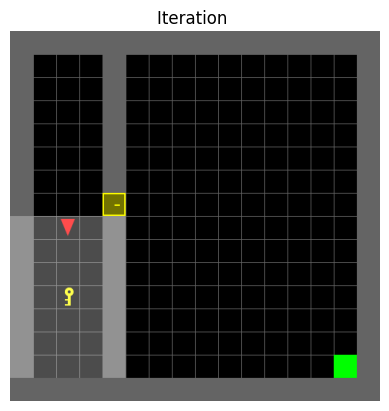


Knowledge Base: 
Room 0:
  yellow key is at (2, 11)
  yellow door is at (4, 7) and is currently locked
Room 1:
  green goal is at (14, 14)
  yellow door is at (4, 7) and is currently locked

Connections:
Room 0 connect to Room 1 by yellow door at (4, 7) which is currently locked



In [5]:
%reload_ext autoreload
%autoreload 2
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
from VLA2Systems.utils import (
    print_grid,
    render_env
)
from VLA2Systems.knowledge_base import KnowledgeBase
import imageio

def save_env_image(env, filename="env_image.png"):
    """Save the environment image to a file."""
    frame = env.render()
    imageio.imwrite(filename, frame)

# # List all available MiniGrid environments
env_list = [env_id for env_id in gym.envs.registry if "MiniGrid" in env_id]
print(env_list)
# Randomly select an environment
env_name = random.choice(env_list)
# print(f"Selected Environment: {env_name}")
env_name = "MiniGrid-DoorKey-16x16-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
# env_name = "BabyAI-BossLevel-v0"

seed = 69
# seed = random.randint(1, 1000)
print(f"seed is {seed}")
# Create the environment
env = gym.make(env_name, render_mode="rgb_array")

# Reset the environment to initialize it
# env.reset(seed=seed)
env.reset()
knowledge_base = KnowledgeBase(env)
# Print the grid
# print("\nGrid Map:")
# print_grid(knowledge_base.grid_data)
# Render the environment dynamically
fig, ax = plt.subplots()
render_env(env, ax, 2)
# Save the environment image
save_env_image(env, filename="env_image.png")

print(f"\nKnowledge Base: \n{knowledge_base}\n")
with open("./file.txt",'w') as file:
    file.write(str(knowledge_base))


In [6]:
%reload_ext autoreload
%autoreload 2
from VLA2Systems.task_planning import RobotPlanner
print("Planner")
robot_position = env.unwrapped.agent_pos
robot_direction = env.unwrapped.agent_dir
start_location = int(robot_direction), tuple((int(robot_position[0]), int(robot_position[1])))
planner = RobotPlanner(knowledge_base, start_location=start_location)


Planner


In [7]:
plan = planner.plan_go_to('yellow', 'door')
# plan = planner.plan_go_to('grey', 'ball')
# plan = planner.plan_go_to('goal', 'green')
# print(plan)
if plan:
    print(planner)
else:
    print("No valid plan found.")

Step 1: Go to yellow door


In [9]:
plan = planner.plan_pick_up('yellow', 'key')
if plan:
    print(planner)
else:
    print("No valid plan found.")

Step 1: Go to yellow key
Step 2: Pick up yellow key
